In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder \
    .appName("plastic_product") \
    .getOrCreate()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving trashwheel.csv to trashwheel.csv


In [ ]:
data = spark.read.csv("/content/trashwheel.csv", header=True, inferSchema=True, sep=";")
data.show()


+---------------------------------------------------------------------------------------------------------------------------------------------------+
|ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered|
+---------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                               mister,Mister Tra...|
|                                                                                                                               mister,Mister Tra...|
|                                                                                                                               mister,Mister Tra...|
|                                                                                                   

In [ ]:
from pyspark.sql import SparkSession

# Initialisation de Spark
spark = SparkSession.builder.appName("CheckColumns").getOrCreate()

# Charger le fichier (mettez ici le chemin correct)
data = spark.read.csv("/content/trashwheel.csv", header=True, inferSchema=True, sep=";")

# Aperçu des données (premières lignes)
data.show(5)


+---------------------------------------------------------------------------------------------------------------------------------------------------+
|ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered|
+---------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                               mister,Mister Tra...|
|                                                                                                                               mister,Mister Tra...|
|                                                                                                                               mister,Mister Tra...|
|                                                                                                   

In [ ]:
print(data.columns)


['ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered']


In [ ]:
data.printSchema()


root
 |-- ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col, isnan

data.select(
    [col(column).isNull().alias(column) for column in data.columns]
).show()


+---------------------------------------------------------------------------------------------------------------------------------------------------+
|ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered|
+---------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                              false|
|                                                                                                                                              false|
|                                                                                                                                              false|
|                                                                                                   

In [ ]:
from pyspark.sql.functions import count, when, col

data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns]).show()



+---------------------------------------------------------------------------------------------------------------------------------------------------+
|ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered|
+---------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                  0|
+---------------------------------------------------------------------------------------------------------------------------------------------------+



In [ ]:
print(data.columns)

['ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered']


In [ ]:
data=data.toDF(*[col.strip().replace(' ','_')for col in data.columns])
print(data.columns)

['ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered']


In [ ]:
raw_data = spark.read.text("/content/trashwheel.csv")

# Exemple : Séparer les colonnes avec un délimiteur `;`
from pyspark.sql.functions import split

data = raw_data.select(split(raw_data['value'], ";").alias('columns'))

# Décomposer en colonnes
data = data.selectExpr(
    "columns[0] as column1", "columns[1] as column2", "columns[2] as column3"
)

data.show()


+--------------------+-------+-------+
|             column1|column2|column3|
+--------------------+-------+-------+
|ID,Name,Dumpster,...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
|mister,Mister Tra...|   NULL|   NULL|
+--------------------+-------+-------+
only showing top 20 rows



In [ ]:
data = spark.read.csv("/content/trashwheel.csv", header=True, inferSchema=True, sep=",")
data.show(5)


+------+------------------+--------+-----+----+---------+------------------+------+--------------+-----------+--------------+------------+-----------+--------+-----------+------------+
|    ID|              Name|Dumpster|Month|Year|     Date|            Weight|Volume|PlasticBottles|Polystyrene|CigaretteButts|GlassBottles|PlasticBags|Wrappers|SportsBalls|HomesPowered|
+------+------------------+--------+-----+----+---------+------------------+------+--------------+-----------+--------------+------------+-----------+--------+-----------+------------+
|mister|Mister Trash Wheel|       1|  May|2014|5/16/2014|              4.31|    18|          1450|       1820|        126000|          72|        584|    1162|          7|           0|
|mister|Mister Trash Wheel|       2|  May|2014|5/16/2014|              2.74|    13|          1120|       1030|         91000|          42|        496|     874|          5|           0|
|mister|Mister Trash Wheel|       3|  May|2014|5/16/2014|3.4499999999999997

In [ ]:
data.printSchema()


root
 |-- ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Dumpster: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- PlasticBottles: string (nullable = true)
 |-- Polystyrene: string (nullable = true)
 |-- CigaretteButts: string (nullable = true)
 |-- GlassBottles: string (nullable = true)
 |-- PlasticBags: string (nullable = true)
 |-- Wrappers: string (nullable = true)
 |-- SportsBalls: string (nullable = true)
 |-- HomesPowered: integer (nullable = true)



In [ ]:
data.select('Weight').groupBy().avg().show()


+-----------------+
|      avg(Weight)|
+-----------------+
|2.966122860020137|
+-----------------+



In [ ]:
data.filter(data['Year'] == 2014).show()


+------+------------------+--------+-----+----+---------+------------------+------+--------------+-----------+--------------+------------+-----------+--------+-----------+------------+
|    ID|              Name|Dumpster|Month|Year|     Date|            Weight|Volume|PlasticBottles|Polystyrene|CigaretteButts|GlassBottles|PlasticBags|Wrappers|SportsBalls|HomesPowered|
+------+------------------+--------+-----+----+---------+------------------+------+--------------+-----------+--------------+------------+-----------+--------+-----------+------------+
|mister|Mister Trash Wheel|       1|  May|2014|5/16/2014|              4.31|    18|          1450|       1820|        126000|          72|        584|    1162|          7|           0|
|mister|Mister Trash Wheel|       2|  May|2014|5/16/2014|              2.74|    13|          1120|       1030|         91000|          42|        496|     874|          5|           0|
|mister|Mister Trash Wheel|       3|  May|2014|5/16/2014|3.4499999999999997

In [ ]:
from pyspark.sql.functions import col

# Conversion des colonnes en type numérique (double)
data = data.withColumn('PlasticBottles', col('PlasticBottles').cast('double'))
data = data.withColumn('Polystyrene', col('Polystyrene').cast('double'))
data = data.withColumn('CigaretteButts', col('CigaretteButts').cast('double'))
data = data.withColumn('GlassBottles', col('GlassBottles').cast('double'))
data = data.withColumn('PlasticBags', col('PlasticBags').cast('double'))
data = data.withColumn('Wrappers', col('Wrappers').cast('double'))
data = data.withColumn('SportsBalls', col('SportsBalls').cast('double'))

# Vérifier les types de données après conversion
data.printSchema()


root
 |-- ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Dumpster: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- PlasticBottles: double (nullable = true)
 |-- Polystyrene: double (nullable = true)
 |-- CigaretteButts: double (nullable = true)
 |-- GlassBottles: double (nullable = true)
 |-- PlasticBags: double (nullable = true)
 |-- Wrappers: double (nullable = true)
 |-- SportsBalls: double (nullable = true)
 |-- HomesPowered: integer (nullable = true)



In [ ]:
from pyspark.sql.functions import col
data.filter(col('Volume').isNull() | col('PlasticBottles').isNull() |
            col('Polystyrene').isNull() | col('CigaretteButts').isNull() |
            col('GlassBottles').isNull() | col('PlasticBags').isNull() |
            col('Wrappers').isNull() | col('SportsBalls').isNull()).show()


+---------+--------------------+--------+---------+----+--------+------+------+--------------+-----------+--------------+------------+-----------+--------+-----------+------------+
|       ID|                Name|Dumpster|    Month|Year|    Date|Weight|Volume|PlasticBottles|Polystyrene|CigaretteButts|GlassBottles|PlasticBags|Wrappers|SportsBalls|HomesPowered|
+---------+--------------------+--------+---------+----+--------+------+------+--------------+-----------+--------------+------------+-----------+--------+-----------+------------+
|professor|Professor Trash W...|       1|  January|2017|  1/2/17|  1.79|    15|        1950.0|     6080.0|       19700.0|         8.0|     3100.0| 15600.0|       NULL|          30|
|professor|Professor Trash W...|       2|  January|2017| 1/30/17|  1.58|    15|        9540.0|    11230.0|       17600.0|        14.0|     5630.0| 16700.0|       NULL|          26|
|professor|Professor Trash W...|       3| February|2017| 2/26/17|  2.32|    18|        8350.0| 

In [ ]:
data_cleaned = data.na.drop(subset=['Volume', 'PlasticBottles', 'Polystyrene', 'CigaretteButts',
                                    'GlassBottles', 'PlasticBags', 'Wrappers', 'SportsBalls'])


In [ ]:
from pyspark.ml.feature import VectorAssembler # Importing the VectorAssembler class
from pyspark.ml.regression import LinearRegression # Import LinearRegression
# Assuming you want to assemble the following columns:
feature_columns = ['PlasticBottles', 'Polystyrene', 'CigaretteButts', 'GlassBottles',
                  'PlasticBags', 'Wrappers', 'SportsBalls']

# Create and configure the VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
# Create a LinearRegression object
lr = LinearRegression(featuresCol="features", labelCol="Volume") # Assuming 'Volume' is your target variable


# Now you can use the assembler
data_sample = data.limit(100)  # Limiter à 100 lignes
data_assembled_sample = assembler.transform(data_sample)
lr_model = lr.fit(data_assembled_sample)


In [ ]:
# Supprimer les lignes avec des valeurs nulles dans les colonnes pertinentes
data_cleaned = data.na.drop(subset=['Volume', 'PlasticBottles', 'Polystyrene', 'CigaretteButts',
                                   'GlassBottles', 'PlasticBags', 'Wrappers', 'SportsBalls'])

# Appliquer le VectorAssembler
assembler = VectorAssembler(
    inputCols=['Volume', 'PlasticBottles', 'Polystyrene', 'CigaretteButts',
               'GlassBottles', 'PlasticBags', 'Wrappers', 'SportsBalls'],
    outputCol='features'
)

data_assembled = assembler.transform(data_cleaned)

# Créer et entraîner le modèle de régression linéaire
lr = LinearRegression(featuresCol='features', labelCol='Weight')
lr_model = lr.fit(data_assembled)




In [ ]:
from pyspark.ml.feature import VectorAssembler

# Utiliser uniquement PlasticBottles comme entrée
assembler = VectorAssembler(inputCols=['PlasticBottles'], outputCol='features')
data_assembled = assembler.transform(data)


In [ ]:
# Supprimer les lignes où PlasticBottles est null
data_cleaned = data.filter(data.PlasticBottles.isNotNull())

# Appliquer le VectorAssembler sur les données nettoyées
data_assembled = assembler.transform(data_cleaned)


In [ ]:
from pyspark.sql.functions import coalesce, lit

# Remplacer les valeurs nulles par 0 dans la colonne PlasticBottles
data_filled = data.withColumn("PlasticBottles", coalesce(data.PlasticBottles, lit(0)))

# Appliquer le VectorAssembler sur les données modifiées
data_assembled = assembler.transform(data_filled)


In [ ]:
assembler = VectorAssembler(inputCols=['PlasticBottles'], outputCol='features', handleInvalid='skip')
data_assembled = assembler.transform(data)


In [ ]:
# Compter les valeurs nulles dans la colonne PlasticBottles
data.filter(data.PlasticBottles.isNull()).count()


1

In [ ]:
from pyspark.ml.regression import LinearRegression

# Créer un modèle de régression linéaire avec PlasticBottles comme caractéristique
lr = LinearRegression(featuresCol='features', labelCol='Weight')

# Entraîner le modèle
lr_model = lr.fit(data_assembled)


In [ ]:
# Faire des prédictions avec le modèle entraîné
predictions = lr_model.transform(data_assembled)

# Afficher les prédictions
predictions.select('PlasticBottles', 'GlassBottles', 'prediction').show(5)


+--------------+------------+------------------+
|PlasticBottles|GlassBottles|        prediction|
+--------------+------------+------------------+
|        1450.0|        72.0| 3.069374445609601|
|        1120.0|        42.0|3.1132674906146325|
|        2450.0|        50.0| 2.936365218321626|
|        2380.0|        52.0| 2.945675864231784|
|         980.0|        72.0|3.1318887824349493|
+--------------+------------+------------------+
only showing top 5 rows



In [ ]:
# Appliquer le modèle pour faire des prédictions sur les données
predictions = lr_model.transform(data_assembled)

# Afficher les prédictions
predictions.select("PlasticBottles", "GlassBottles", "prediction").show()

# Afficher le schéma des données après prédiction
predictions.printSchema()


+--------------+------------+------------------+
|PlasticBottles|GlassBottles|        prediction|
+--------------+------------+------------------+
|        1450.0|        72.0| 3.069374445609601|
|        1120.0|        42.0|3.1132674906146325|
|        2450.0|        50.0| 2.936365218321626|
|        2380.0|        52.0| 2.945675864231784|
|         980.0|        72.0|3.1318887824349493|
|        1430.0|        46.0|3.0720346301553603|
|         910.0|        32.0|3.1411994283451072|
|        3580.0|        58.0| 2.786064791486214|
|        2400.0|        49.0|2.9430156796860247|
|        1340.0|        75.0|3.0840054606112783|
|         740.0|        38.0| 3.163810996984063|
|         950.0|        45.0|3.1358790592535883|
|         530.0|        58.0| 3.191742934714538|
|         840.0|        62.0|3.1505100742552656|
|        1130.0|        64.0|3.1119373983417526|
|        1640.0|        56.0|3.0441026924248855|
|        1350.0|        47.0|3.0826753683383985|
|        1640.0|    

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
predictions_pd = predictions.select("PlasticBottles", "GlassBottles", "prediction").toPandas()
predictions_pd.head()


,PlasticBottles,GlassBottles,prediction
0,1450.0,72.0,3.069374
1,1120.0,42.0,3.113267
2,2450.0,50.0,2.936365
3,2380.0,52.0,2.945676
4,980.0,72.0,3.131889


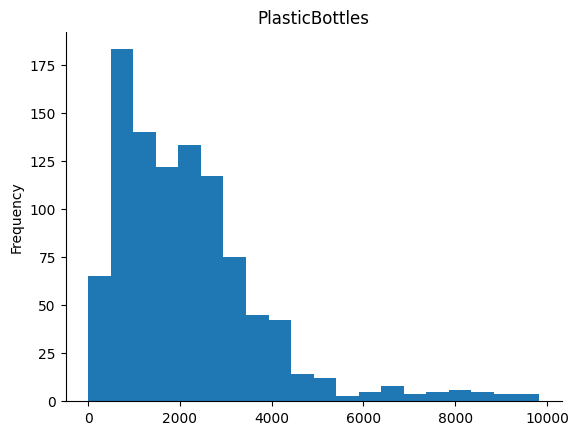

In [ ]:
# @title PlasticBottles

from matplotlib import pyplot as plt
predictions_pd['PlasticBottles'].plot(kind='hist', bins=20, title='PlasticBottles')
plt.gca().spines[['top', 'right',]].set_visible(False)

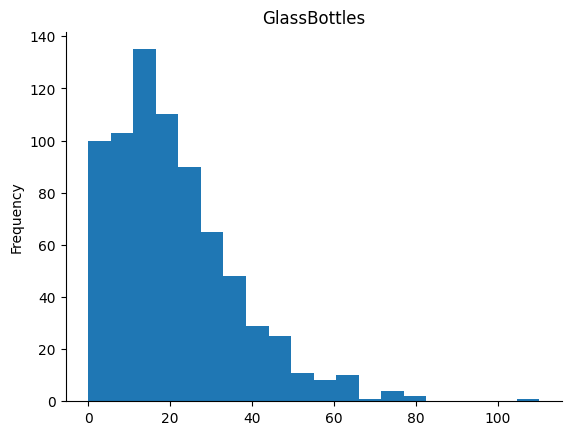

In [ ]:
# @title GlassBottles

from matplotlib import pyplot as plt
predictions_pd['GlassBottles'].plot(kind='hist', bins=20, title='GlassBottles')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title prediction

from matplotlib import pyplot as plt
predictions_pd['prediction'].plot(kind='line', figsize=(8, 4), title='prediction')
plt.gca().spines[['top', 'right']].set_visible(False)

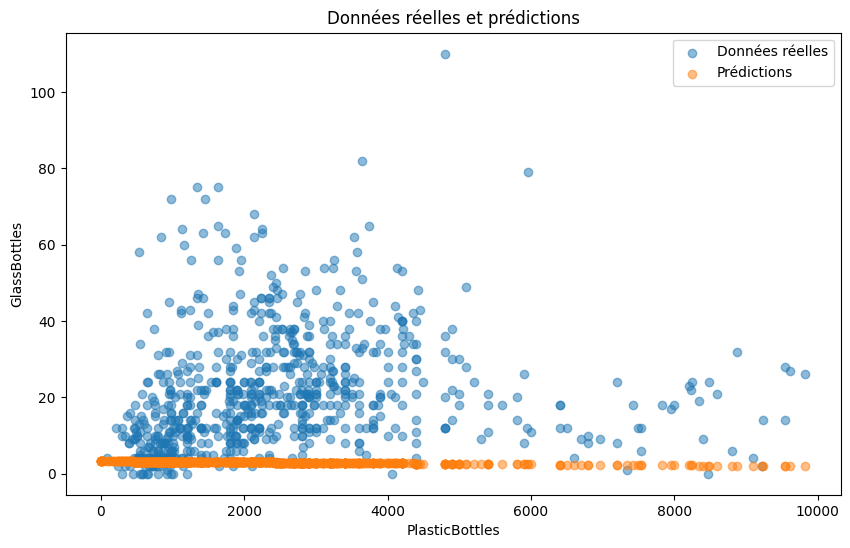

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['PlasticBottles'], predictions_pd['GlassBottles'], label='Données réelles', alpha=0.5)
plt.scatter(predictions_pd['PlasticBottles'], predictions_pd['prediction'], label='Prédictions', alpha=0.5)
plt.xlabel('PlasticBottles')
plt.ylabel('GlassBottles')
plt.title('Données réelles et prédictions')
plt.legend()
plt.show()

In [ ]:
predictions.printSchema()


root
 |-- ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Dumpster: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- PlasticBottles: double (nullable = true)
 |-- Polystyrene: double (nullable = true)
 |-- CigaretteButts: double (nullable = true)
 |-- GlassBottles: double (nullable = true)
 |-- PlasticBags: double (nullable = true)
 |-- Wrappers: double (nullable = true)
 |-- SportsBalls: double (nullable = true)
 |-- HomesPowered: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [ ]:
predictions_pd = predictions.select("PlasticBottles", "GlassBottles", "prediction").toPandas()


In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
!git config --global user.email "ameladalet772@gmail.com"
!git config --global user.name "amel"


In [ ]:
!git clone https://github.com/Adalette/mini-projet.git

fatal: destination path 'mini-projet' already exists and is not an empty directory.


In [ ]:
!ls /content


mini-projet  sample_data  trashwheel.csv


In [ ]:
!git clone https://github.com/Adalette/mini-projet  sample_data  trashwheel.csv.git


fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

In [ ]:
!ls /content/




sample_data
